## IMPORTNG LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## LOADING THE DATA

In [4]:
df = pd.read_csv('hotel_booking.csv')

In [5]:
df['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [7]:
df.shape

(119390, 36)

## DATA CLEANING

In [9]:
# DROPPING CUSTOMERS PERSONAL INFORMATION AS THEY ARE NOT NEEDED

df.drop(columns= ['name','email','phone-number','credit_card'],inplace=True)

In [10]:
df.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype=object)

In [11]:
# CHECKING FOR MISSING VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [17]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [18]:
# TO SEE THE UNIQUE VALUES
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('-'*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'I

In [19]:
## LOOKING AT THE SUMMARY STATISTICS OF THE NUMBERICAL DATA
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [20]:
# TO REMOVE THE OUTLIERS
df = df[df['adr'] < 5000]

## ANALYZING THE DATA

In [22]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

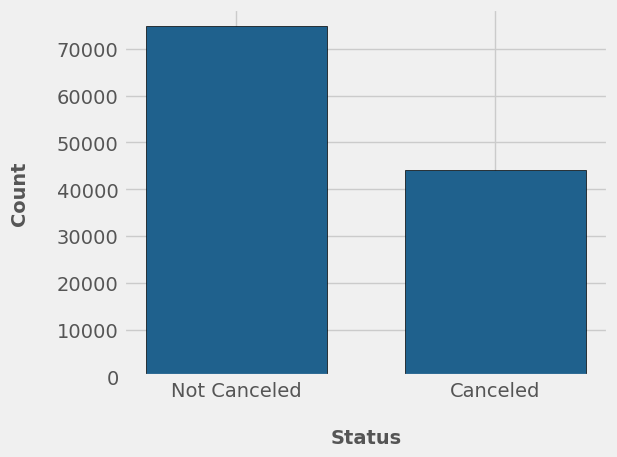

In [111]:
plt.style.use('fivethirtyeight')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),color='#1f618d',edgecolor='k',width= 0.7)
plt.ylabel('Count',fontsize=14,fontweight='bold',labelpad=20)
plt.xlabel('Status',fontsize=14,fontweight='bold',labelpad=20)
plt.tight_layout()
plt.savefig('count')

## Impact of Hotel Rates on Cancellations

In [25]:
# As Price Of Resort Hotel Are Greater Than City Hotel
hotels = df.groupby('hotel')['is_canceled'].value_counts(normalize=True)
hotels

hotel         is_canceled
City Hotel    0              0.582918
              1              0.417082
Resort Hotel  0              0.720250
              1              0.279750
Name: proportion, dtype: float64

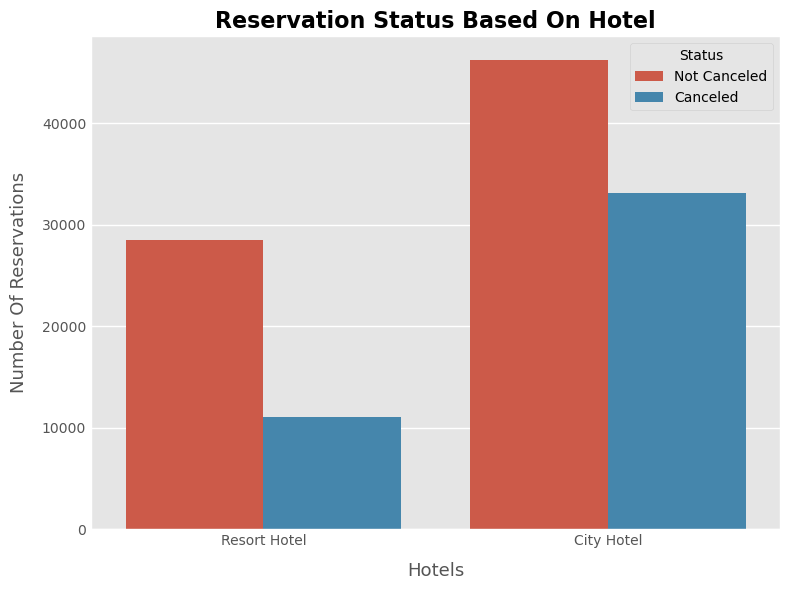

In [83]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='hotel',hue='is_canceled',data=df)
ax.set_title('Reservation Status Based On Hotel',fontsize=16,fontweight='bold')
ax.set_xlabel('Hotels',labelpad=10,fontsize=13)
ax.set_ylabel('Number Of Reservations',labelpad=10,fontsize=13)
new_labels = ['Not Canceled','Canceled']
ax.legend(title='Status',labels=new_labels)
plt.tight_layout()
plt.savefig('reservation_status')

### Calculating Percentage Of Cancelation Based On Hotels 

In [28]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

### Based On Price

In [30]:
city_hotel = df[df['hotel'] == 'City Hotel'] 
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [31]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

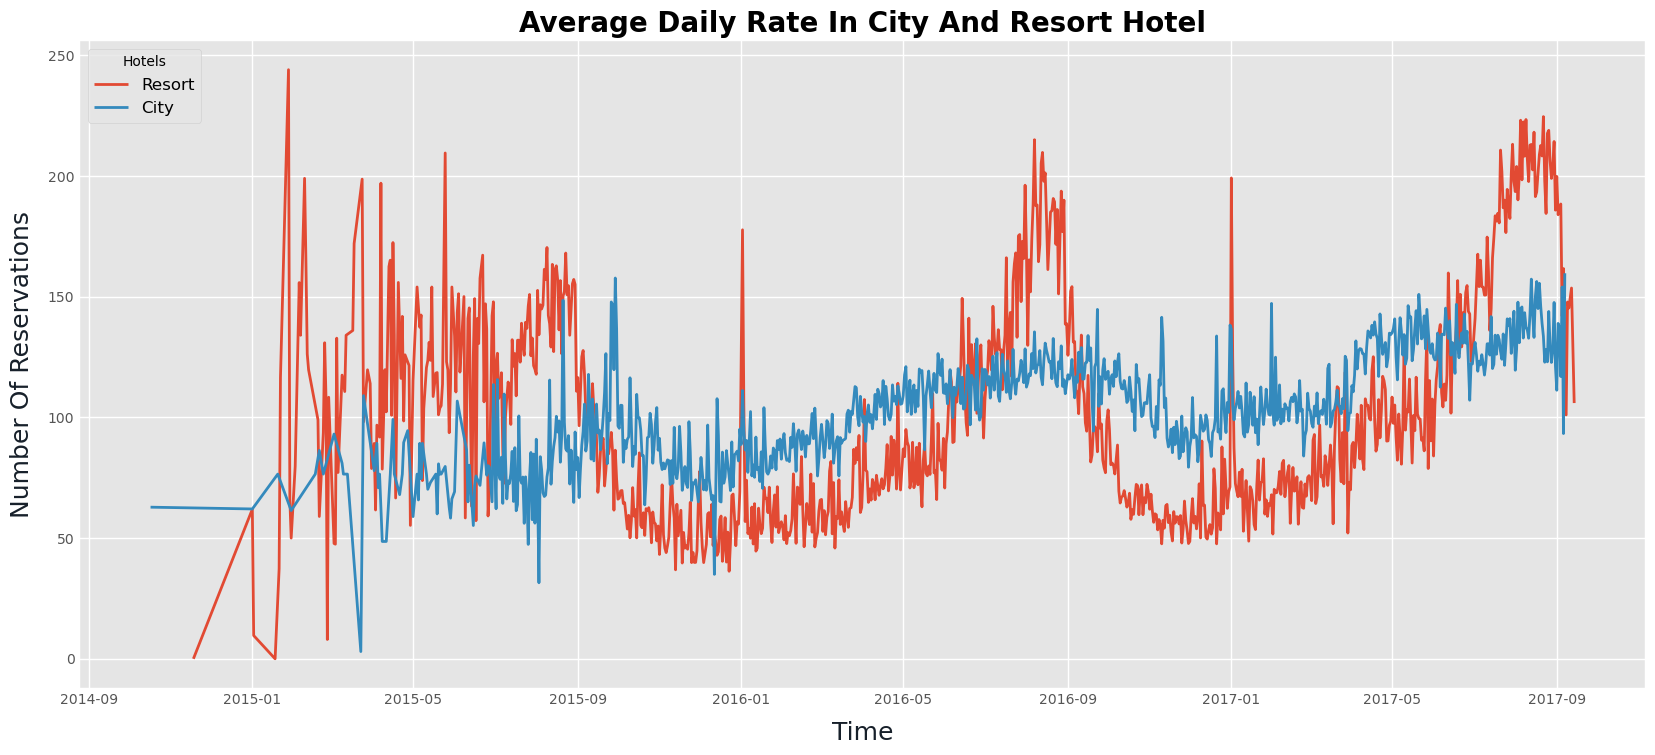

In [87]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(resort_hotel.index,resort_hotel['adr'],label="Resort Hotel",linewidth=2)
ax.plot(city_hotel.index,city_hotel['adr'],label="City Hotel",linewidth=2)
ax.set_title('Average Daily Rate In City And Resort Hotel',fontsize=20,fontweight='bold')
ax.set_xlabel('Time',labelpad=10,fontsize=18,color='#17202a')
ax.set_ylabel('Number Of Reservations',labelpad=10,fontsize=18,color='#17202a')
new_labels = ['Resort','City']
legend = ax.legend(loc= 'upper left', title='Hotels',labels=new_labels,fontsize=12)
plt.savefig('adr_city_and_resort')

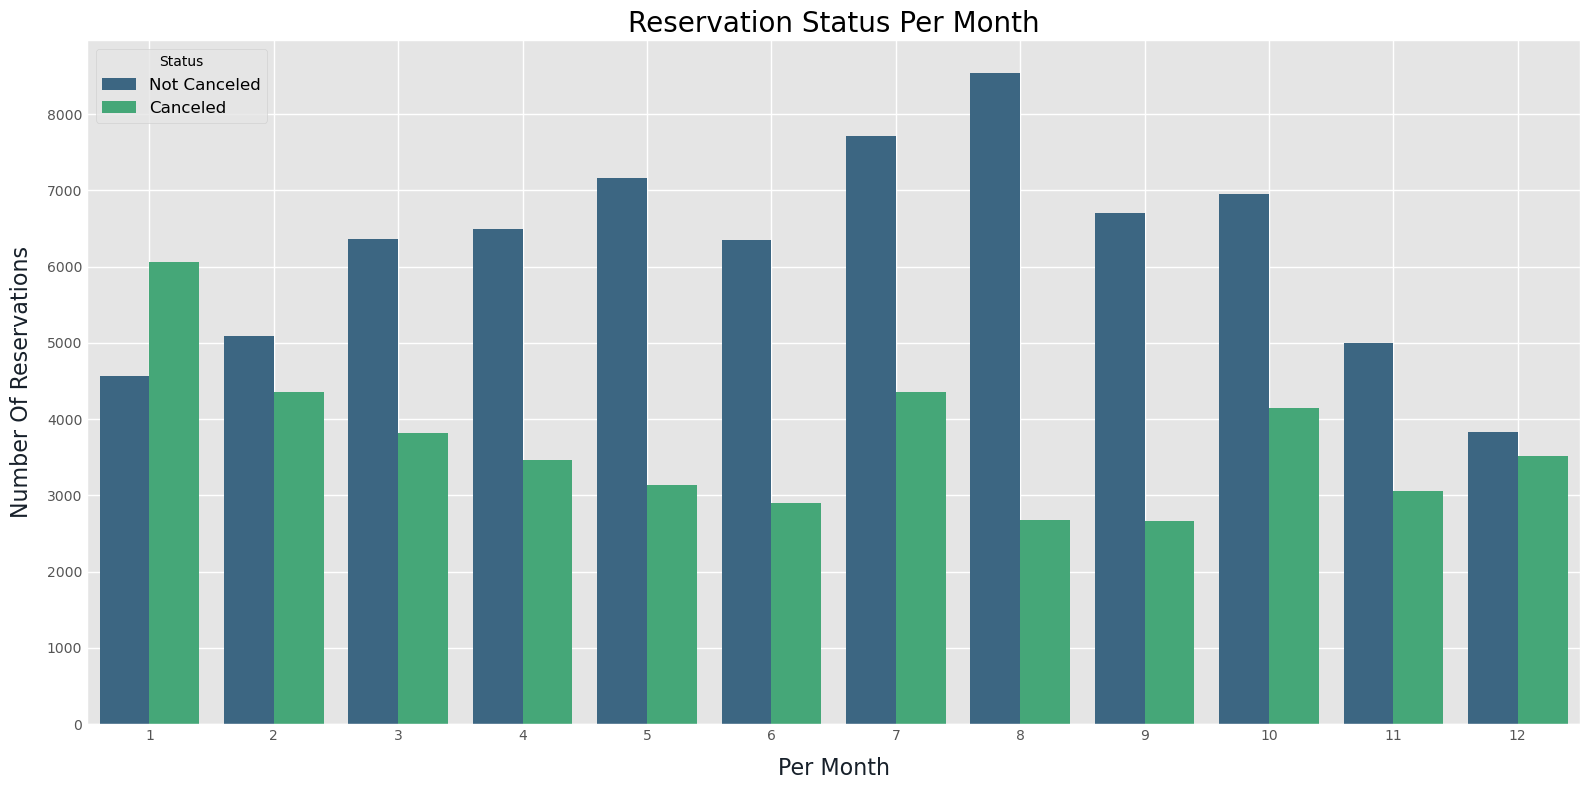

In [91]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16,8))
df['month'] = df['reservation_status_date'].dt.month
ax = sns.countplot(x='month',hue='is_canceled',palette='viridis',data=df)
ax.set_title('Reservation Status Per Month',fontsize=20)
ax.set_xlabel('Per Month',labelpad=10,fontsize=16,color='#17202a')
ax.set_ylabel('Number Of Reservations',labelpad=10,fontsize=16,color='#17202a')
new_labels = ['Not Canceled','Canceled']
legend = ax.legend(loc= 'upper left', title='Status',labels=new_labels,fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.savefig('Reservation Status Per Month')

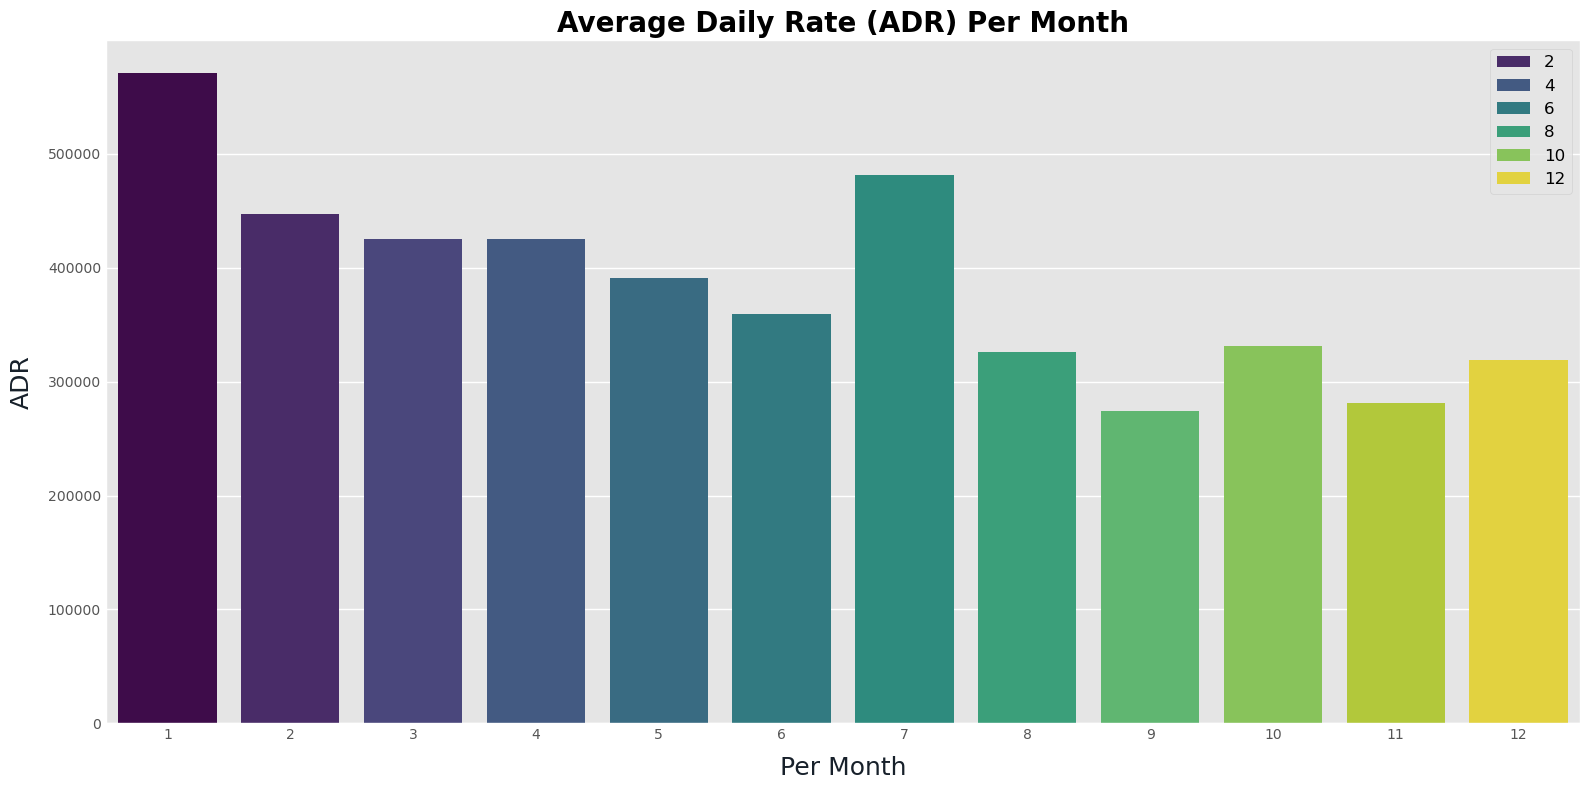

In [93]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Average Daily Rate (ADR) Per Month',fontsize=20,fontweight='bold')
ax.set_xlabel('Per Month',labelpad=10,fontsize=18,color='#17202a')
ax.set_ylabel('ADR',labelpad=10,fontsize=18,color='#17202a')
ax = sns.barplot(x='month',y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(),hue='month',palette='viridis')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Average_Daily_Rate')

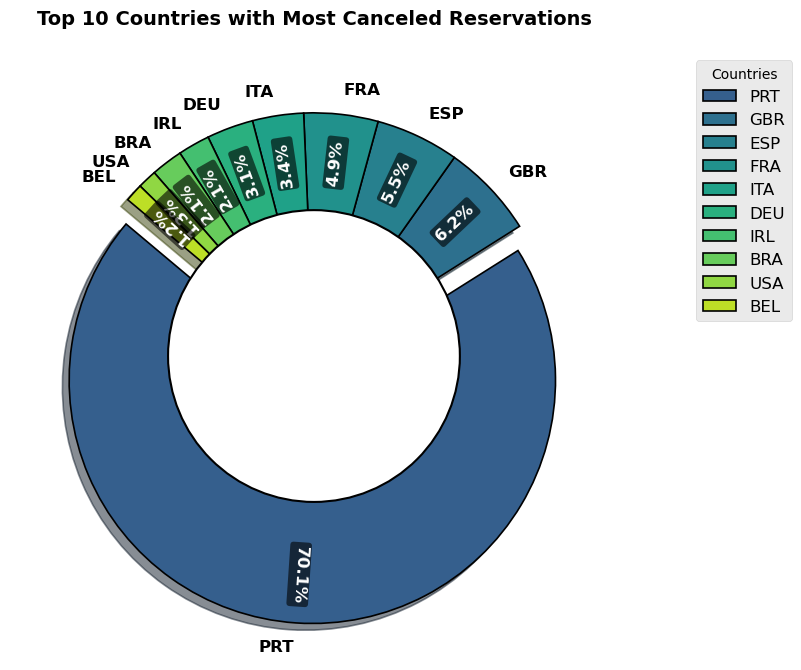

<Figure size 640x480 with 0 Axes>

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Filter only canceled bookings
canceled_data = df[df['is_canceled'] == 1]

# Get the top 10 countries with the most cancellations
top_10_countries = canceled_data['country'].value_counts().head(10)

# Define figure size
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Top 10 Countries with Most Canceled Reservations', fontsize=14, fontweight='bold', pad=20)

# Define colors using colormap
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_10_countries)))

# Explode the highest cancellation country for emphasis
explode = [0.1 if i == 0 else 0 for i in range(len(top_10_countries))]

# Create pie chart
wedges, texts, autotexts = ax.pie(
    top_10_countries,
    labels=top_10_countries.index,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    startangle=140,
    shadow=True,
    pctdistance=0.8,  # Moves percentage labels closer to slices
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2, 'antialiased': True},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Add a central white circle for donut effect
centre_circle = plt.Circle((0, 0), 0.6, fc='white', edgecolor='black', linewidth=1.5)
fig.gca().add_artist(centre_circle)

# Rotate percentages dynamically based on slice position
for autotxt, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Get the middle angle of each slice
    autotxt.set_rotation(angle)
    autotxt.set_rotation_mode("anchor")
    autotxt.set_color("white")  # Make text white for contrast
    autotxt.set_fontsize(12)
    autotxt.set_bbox(dict(facecolor='black', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2'))

# Add legend outside the chart
plt.legend(wedges, top_10_countries.index, title="Countries", loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=12, frameon=True)

# Adjust layout & display chart
plt.tight_layout()
plt.show()
plt.savefig('Top 10 countries')

In [36]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [117]:
df[df['is_canceled']==1]['market_segment'].value_counts(normalize=True) * 100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

In [38]:
canceled_df_adr = df[df['is_canceled'] == 1].groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values(by='reservation_status_date', inplace=True)
canceled_df_adr

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-02,9.633750
4,2015-01-18,0.000000
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


In [39]:
not_canceled_adr_df = df[df['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean()
not_canceled_adr_df.reset_index(inplace=True)
not_canceled_adr_df.sort_values(by='reservation_status_date',inplace=True)
not_canceled_adr_df

,reservation_status_date,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


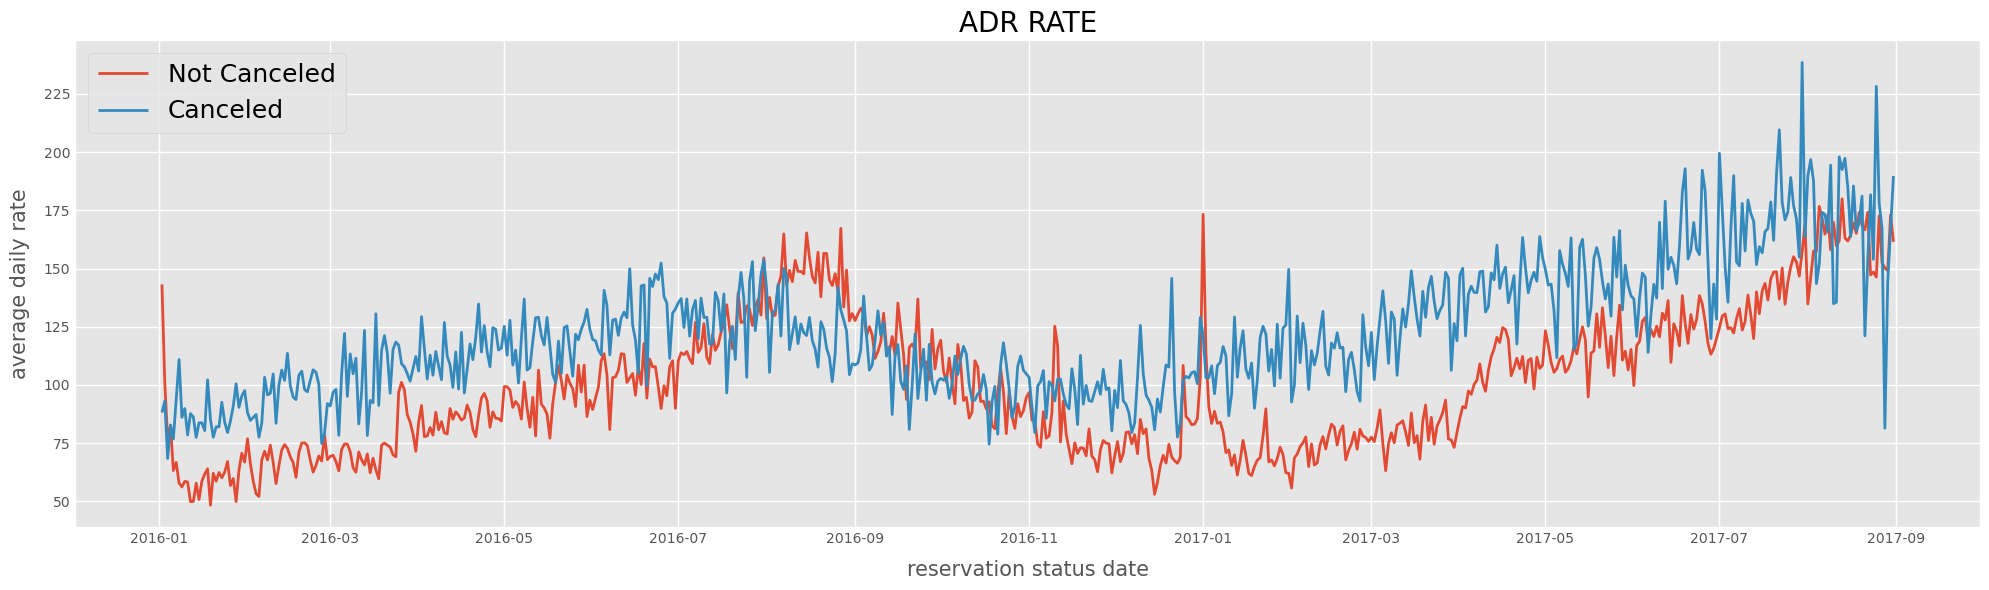

In [115]:
plt.style.use('ggplot')
plt.subplots(figsize=(20,6))
sns.lineplot(x=not_canceled_adr_df['reservation_status_date'],y =not_canceled_adr_df['adr'],label='Not Canceled',linewidth=2,linestyle='solid')
sns.lineplot(x=canceled_df_adr['reservation_status_date'],y =canceled_df_adr['adr'],label= 'Canceled',linewidth=2,linestyle='solid')
plt.title('ADR RATE',fontsize=20)
plt.xlabel('reservation status date',labelpad=10,fontsize=15)
plt.ylabel('average daily rate',labelpad=10,fontsize=15)
plt.legend(loc='upper left',fontsize=18)
plt.tight_layout()
plt.savefig('ADR_RaTE1.png')

In [41]:
not_canceled_adr_df = not_canceled_adr_df[(not_canceled_adr_df['reservation_status_date'] > '2016') & (not_canceled_adr_df['reservation_status_date'] < '2017-09')]
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date'] > '2016') & (canceled_df_adr['reservation_status_date'] < '2017-09')]

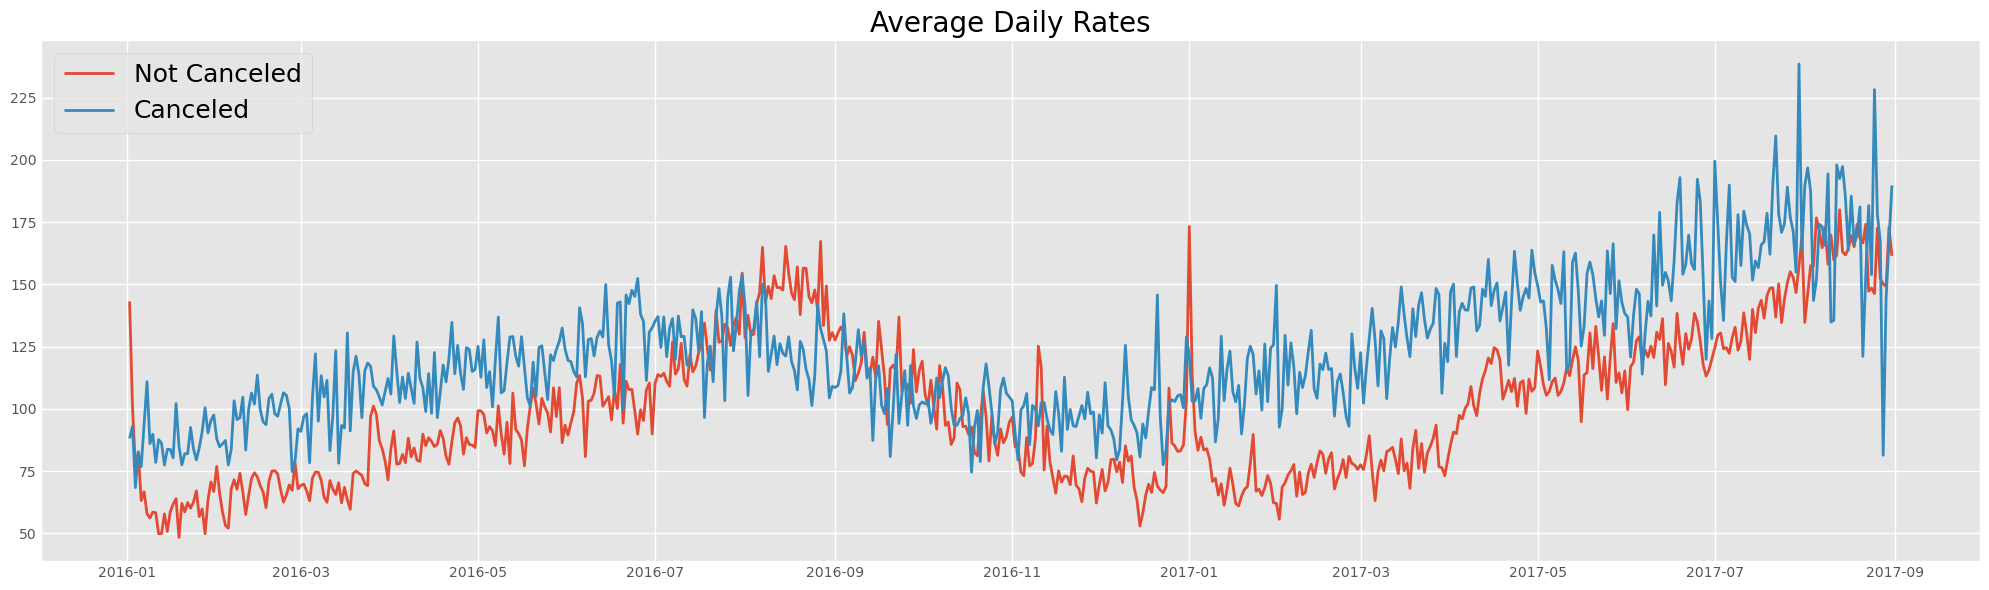

In [119]:
plt.figure(figsize=(20,6))
plt.plot(not_canceled_adr_df['reservation_status_date'],not_canceled_adr_df['adr'],label='Not Canceled',linewidth=2)
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='Canceled',linewidth=2)
plt.title('Average Daily Rates',fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('adr_rate_2')
